# Deeplizard tutorial part 1

## Preparation preprocessing

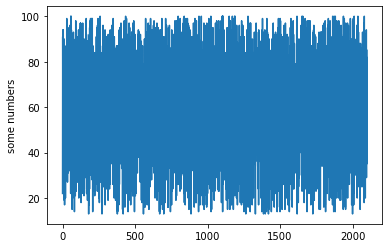

In [1]:
import tensorflow as tf
from tensorflow import keras
import itertools
import json
import os
from random import randint

import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import shuffle
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.python.keras.models import load_model


train_samples = []
train_labels = []

for i in range(50):
    random_younger = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(1)

    random_younger = randint(65,100)
    train_samples.append(random_younger)
    train_labels.append(0)

for i in range(1000):
    random_younger = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(0)

    random_younger = randint(65,100)
    train_samples.append(random_younger)
    train_labels.append(1)

plt.plot(train_samples)
plt.ylabel('some numbers')
plt.show()

train_labels = np.array(train_labels)
train_samples = np.array(train_samples)

train_labels, train_samples = shuffle(train_labels, train_samples)

scaler = MinMaxScaler(feature_range=(0,1))
scaled_train_samples = scaler.fit_transform(train_samples.reshape(-1,1))

## Dati per il test
In questo caso di esempio è identico alla creazione dei dati "reali"

In [2]:
test_samples = []
test_labels = []

for i in range(10):
    random_younger = randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(1)

    random_younger = randint(65,100)
    test_samples.append(random_younger)
    test_labels.append(0)

for i in range(200):
    random_younger = randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(0)

    random_younger = randint(65,100)
    test_samples.append(random_younger)
    test_labels.append(1)

test_labels = np.array(test_labels)
test_samples = np.array(test_samples)

test_labels, test_samples = shuffle(test_labels, test_samples)

scaler = MinMaxScaler(feature_range=(0,1))
scaled_test_samples = scaler.fit_transform(test_samples.reshape(-1,1))

## GPU setup
To Check if keras(>=2.1.1) is using GPU:

In [3]:
print("Built with CUDA: ", tf.test.is_built_with_cuda())
# sess = tf.compat.v1.Session(config=tf.compat.v1.ConfigProto(log_device_placement=True))
tf.config.list_physical_devices('GPU')

Built with CUDA:  True


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [4]:
gpus = tf.config.experimental.list_physical_devices('GPU')
print("Num GPU available", len(gpus))
tf.config.experimental.set_memory_growth(gpus[0], True)

Num GPU available 1


## Simple keras sequential model

In [5]:
model = Sequential([
    Dense(units=16, input_shape=(1,), activation='relu'),
    Dense(units=32, activation='relu'),
    Dense(units=2, activation='softmax')
])

model.summary()

model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(x=scaled_train_samples, y=train_labels, batch_size=10, epochs=30, shuffle=True, verbose=2)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                32        
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
210/210 - 1s - loss: 0.7064 - accuracy: 0.4329
Epoch 2/30
210/210 - 0s - loss: 0.6630 - accuracy: 0.6143
Epoch 3/30
210/210 - 0s - loss: 0.6237 - accuracy: 0.7295
Epoch 4/30
210/210 - 0s - loss: 0.5923 - accuracy: 0.7652
Epoch 5/30
210/210 - 0s - loss: 0.5634 - accuracy: 0.7967
Epoch 6/30
210/210 - 0s - loss: 0.5326 - accuracy: 0.8314
Epoch 7/30
210/210 - 0s - loss: 0.5034 -

## Build validation set
Dobbiamo estrarre una parte di dati che potremo poi utilizzare per testare il nostro modello. In questo modo possiamo vedere quanto il nostro modello sia generico e possa essere utilizzato con successo su nuovi dati. Questi dati non potranno essere utilizzati per il training.

Dobbiamo ricordare che lo shuffle automatico dato dal parametro `shuffle=true` viene fatto dopo l'estrazione dei dati di validazione. Se non abbiamo già eseguito uno shuffle sul nostro campione, ci ritroviamo magari ad avere tutti i pazienti malati alla fine e di conseguenza un set di validazione con solo pazienti malati.

Dobbiamo sempre ricordarci di fare uno shuffle manuale prima di estrarre i dati di validazione.

In [6]:
model.fit(x=scaled_train_samples, y=train_labels, batch_size=10, epochs=30, shuffle=True, verbose=2, validation_split=.1)

Epoch 1/30
189/189 - 1s - loss: 0.2728 - accuracy: 0.9302 - val_loss: 0.2492 - val_accuracy: 0.9286
Epoch 2/30
189/189 - 0s - loss: 0.2715 - accuracy: 0.9307 - val_loss: 0.2482 - val_accuracy: 0.9286
Epoch 3/30
189/189 - 0s - loss: 0.2704 - accuracy: 0.9339 - val_loss: 0.2474 - val_accuracy: 0.9286
Epoch 4/30
189/189 - 0s - loss: 0.2693 - accuracy: 0.9312 - val_loss: 0.2465 - val_accuracy: 0.9286
Epoch 5/30
189/189 - 0s - loss: 0.2683 - accuracy: 0.9339 - val_loss: 0.2460 - val_accuracy: 0.9286
Epoch 6/30
189/189 - 0s - loss: 0.2674 - accuracy: 0.9339 - val_loss: 0.2455 - val_accuracy: 0.9286
Epoch 7/30
189/189 - 0s - loss: 0.2664 - accuracy: 0.9339 - val_loss: 0.2451 - val_accuracy: 0.9286
Epoch 8/30
189/189 - 0s - loss: 0.2658 - accuracy: 0.9339 - val_loss: 0.2441 - val_accuracy: 0.9286
Epoch 9/30
189/189 - 0s - loss: 0.2648 - accuracy: 0.9339 - val_loss: 0.2437 - val_accuracy: 0.9286
Epoch 10/30
189/189 - 0s - loss: 0.2641 - accuracy: 0.9339 - val_loss: 0.2429 - val_accuracy: 0.9286

## Predict

In [7]:
predictions = model.predict(x=scaled_test_samples, batch_size=10, verbose=0)
print(predictions)

rounded_predictions = np.argmax(predictions, axis=-1)

print(rounded_predictions)


[[0.04370694 0.956293  ]
 [0.07521743 0.9247825 ]
 [0.0858746  0.9141254 ]
 [0.15379862 0.84620136]
 [0.9792236  0.02077636]
 [0.97846395 0.02153606]
 [0.03551289 0.9644871 ]
 [0.03806495 0.961935  ]
 [0.2783615  0.72163856]
 [0.03089445 0.9691056 ]
 [0.07035669 0.9296433 ]
 [0.787134   0.212866  ]
 [0.13463666 0.86536336]
 [0.9797397  0.02026025]
 [0.9790612  0.02093886]
 [0.67757523 0.3224248 ]
 [0.97899854 0.02100147]
 [0.97830874 0.02169122]
 [0.11869565 0.8813043 ]
 [0.9782637  0.02173638]
 [0.4503745  0.5496255 ]
 [0.9797397  0.02026025]
 [0.4503745  0.5496255 ]
 [0.9795201  0.02047989]
 [0.97914886 0.02085114]
 [0.03089445 0.9691056 ]
 [0.24214305 0.75785697]
 [0.9750295  0.02497046]
 [0.02503956 0.9749604 ]
 [0.0858746  0.9141254 ]
 [0.9183541  0.08164589]
 [0.9782637  0.02173638]
 [0.9543904  0.04560962]
 [0.4503745  0.5496255 ]
 [0.0858746  0.9141254 ]
 [0.9543904  0.04560962]
 [0.02880874 0.9711912 ]
 [0.84349406 0.156506  ]
 [0.97959363 0.02040642]
 [0.02503956 0.9749604 ]


## Result visualization

Utilizzando una confusion matrix possiamo visualizzare i risultati così da poterli valutare.

Confusion matrix without normalization
[[193  17]
 [ 10 200]]


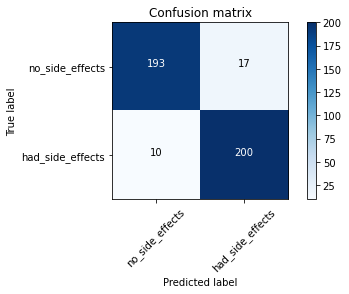

In [8]:
cm = confusion_matrix(y_true=test_labels, y_pred=rounded_predictions)

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    Questa funzione stampa una confusion matrix, la normalizzazione può essere applicata tramite il parametro `normalize=True`.
    :param cm:
    :param classes:
    :param normalize:
    :param title:
    :param cmap:
    :return:
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print("Confusion matrix without normalization")

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

cm_plot_labels = ['no_side_effects','had_side_effects']
plot_confusion_matrix(cm, classes=cm_plot_labels, title="Confusion matrix")

## Save and load models

La funzione di salvataggio salva:

- L'architettura del modello, permettendo di ricreare il modello
- I pesi del modello
- La configurazione di training del modello (loss, optimizer)
- Lo stato dell'optimizer, permettendo di iniziare nuovamente il training da dove si era rimasti

In [9]:
model_path = 'models'
model_file_name = 'medical_trial_model'
model_ext = 'h5'
complete_file_name = '{}/{}.{}'.format(model_path, model_file_name, model_ext)
if os.path.isfile(complete_file_name) is False:
    model.save(complete_file_name)

new_model = load_model(complete_file_name)

new_model.summary()
new_model.get_weights()

json_string = model.to_json()
model_ext = 'json'
complete_file_name = '{}/{}.{}'.format(model_path, model_file_name, model_ext)
with open(complete_file_name, 'w') as outfile:
    outfile.write(json_string)

yaml_string = model.to_yaml()
model_ext = 'yaml'
complete_file_name = '{}/{}.{}'.format(model_path, model_file_name, model_ext)
with open(complete_file_name, 'w') as outfile:
    outfile.write(yaml_string)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 16)                32        
_________________________________________________________________
dense_4 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________
